# Análisis Estadístico: Normalidad e Intervalos de Confianza

Este análisis explora conceptos de normalidad estadística y construcción de intervalos de confianza.


In [1]:
modules = ["scipy", "tqdm"]

import sys
import os.path
from subprocess import check_call
import importlib
import os

def instala(modules):
    print("Instalando módulos")
    for m in modules:
        # para el import quitamos [...] y ==...
        p = m.find("[")
        mi = m if p==-1 else m[:p]
        p = mi.find("==")
        mi = mi if p==-1 else mi[:p]
        torch_loader = importlib.util.find_spec(mi)
        if torch_loader is not None:
            print(m," encontrado")
        else:
            print(m," No encontrado, instalando...",end="")  
            try:        
                r = check_call([sys.executable, "-m", "pip", "install", "--user", m])
                print("¡hecho!")
            except:
                print("¡Problema al instalar ",m,"! ¿seguro que el módulo existe?",sep="")

    print("¡Terminado!")

instala(modules) 

Instalando módulos
scipy  encontrado
tqdm  encontrado
¡Terminado!


**Análisis 1** Tenemos datos obtenidos de dos líneas (columna `Group`) de una cadena de montaje. En cada caso se mide el tiempo que se ha tardado en producir cada ítem (columna `valor`). Leer el fichero y mostrar un histograma con densidad de probabilidad de la columna `valor`, así como, en un diagrama distinto,  un diagrama de barras de la columna `Group`

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/RafaelCaballero/tdm/refs/heads/master/datos/cadena.csv"

# lectura
df = pd.read_csv(url)
df

,valor,Group
0,72.458831,B
1,46.731278,A
2,46.717769,A
3,42.031432,A
4,77.888423,B
...,...,...
195,46.743748,A
196,52.631797,A
197,52.097753,A
198,68.195075,B


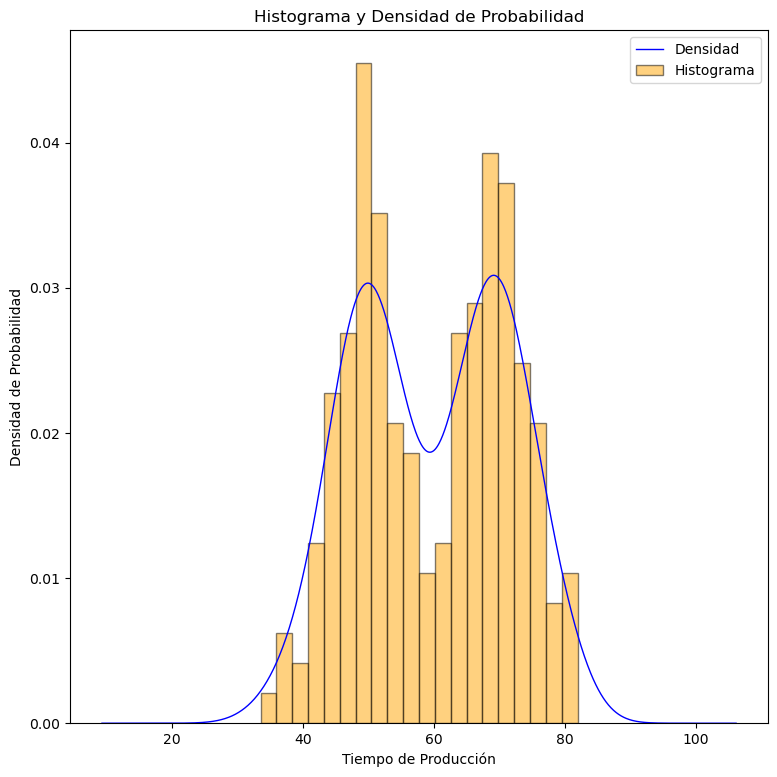

In [3]:
# histograma con función de densidad
plt.figure(figsize=(9, 9)) 

ax = df.valor.plot(kind="density", color="blue", linestyle='-', linewidth=1, label='Densidad')
df.valor.plot(kind="hist", bins =20, density=True, alpha=0.5, ax=ax, color='orange', edgecolor='black', linewidth=1, label='Histograma')

plt.title('Histograma y Densidad de Probabilidad')
plt.xlabel('Tiempo de Producción')
plt.ylabel('Densidad de Probabilidad')

plt.legend()

plt.show()

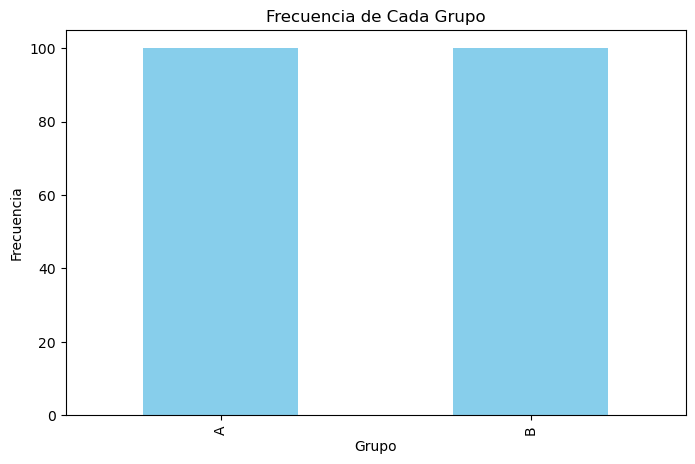

In [4]:
# Diagrama de barras
frecuencias = df['Group'].value_counts().sort_index()
frecuencias.plot(kind='bar', figsize=(8, 5), color='skyblue')

plt.title('Frecuencia de Cada Grupo')
plt.xlabel('Grupo')
plt.ylabel('Frecuencia')
plt.show()

 **Análisis 2** El histograma que acabamos de generar corresponde a una bimodal, una distribución que se puede dar, entre otras razones, porque estemos combinando dos distribuciones normales.
 
 Pensamos que quizás los dos "picos" que muestra el histograma correspondan a los dos valores de la columna `Group`. Para comprobarlo visualmente, crear dos dataframes `dfA` y `dfB` con los datos de df, restringidos al valor de `Group` A y B, respectivamente y mostrar el histograma de la columna `valor`de cada uno de ellos (a ser posible en la misma figura; no hace falta diagrama de densidad)

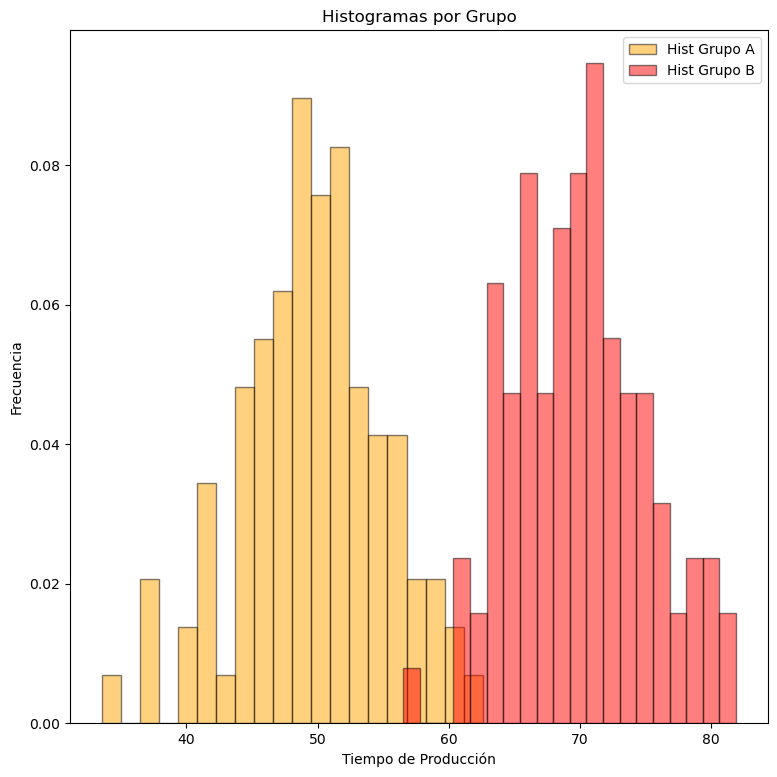

In [5]:
# Crear DataFrames para cada grupo
dfA = df[df['Group'] == 'A']
dfB = df[df['Group'] == 'B']

plt.figure(figsize=(9, 9))

#ax = dfA.valor.plot(kind="density", color="blue", linestyle='-',linewidth=1, label='Densidad Grupo A')
dfA.valor.plot(kind="hist", bins =20 ,density=True, alpha=0.5, color='orange',  edgecolor='black', linewidth=1 , label='Hist Grupo A')   

#ax = dfB.valor.plot(kind="density", color="green", linestyle='-',linewidth=1, label='Densidad Grupo B')
dfB.valor.plot(kind="hist", bins =20 ,density=True, alpha=0.5, color='red', edgecolor='black', linewidth=1, label='Hist Grupo B')

plt.title('Histogramas por Grupo')
plt.xlabel('Tiempo de Producción')
plt.ylabel('Frecuencia')

plt.legend()
plt.show()


**Análisis 3** Pues sí que parece que tiene que ver... calcular la media de cada uno de los dos dataframes utilizando el teorema central del límite, repitiendo 10000 veces:

- Generar 2 muestras aleatorias, `ma` y `mb`, ambas de tamaño 50, una tomada de `dfA` y otra de `dfB`
- Calcular la media de la columna `valor` en cada una de las muestras y acumular el resultado en dos listas, `mediaA` y `mediaB` respectivamente (usar append, tal y como muestra el ejemplo en el notebook de teoría)

Al terminar el código que ya se proporciona convertirá ambas listas en un dataframe con dos columnas A y B (continuamos en el siguiente ejercicio)

In [6]:
from tqdm import tqdm

# Parámetros
veces = 10000
muestra = 50

# Inicializar listas para almacenar las medias
mediaA = []
mediaB = []

# Bucle para calcular las medias
for _ in tqdm(range(veces)):
  # Generar muestras aleatorias
  ma = dfA.sample(muestra)
  mb = dfB.sample(muestra)
  
  # Calcular y almacenar las medias
  mediaA.append( ma.valor.mean() )
  mediaB.append( mb.valor.mean() )

# dejar este código sin tocar
df_medias = pd.DataFrame({"A":mediaA, "B":mediaB})
df_medias

100%|██████████| 10000/10000 [00:00<00:00, 10144.66it/s]


,A,B
0,50.510987,71.277660
1,49.197612,69.166144
2,49.698770,69.259139
3,49.500335,69.241390
4,48.472033,69.826841
...,...,...
9995,50.334910,69.602917
9996,49.533019,69.433274
9997,49.690819,69.889701
9998,49.173105,70.067998


**Análisis 4**

Mostrar el histograma de las columnas `A` y `B` del dataframe `df_medias`. Recordar que estamos viendo el resultado de 10000 experimentos que aproximan la muestra

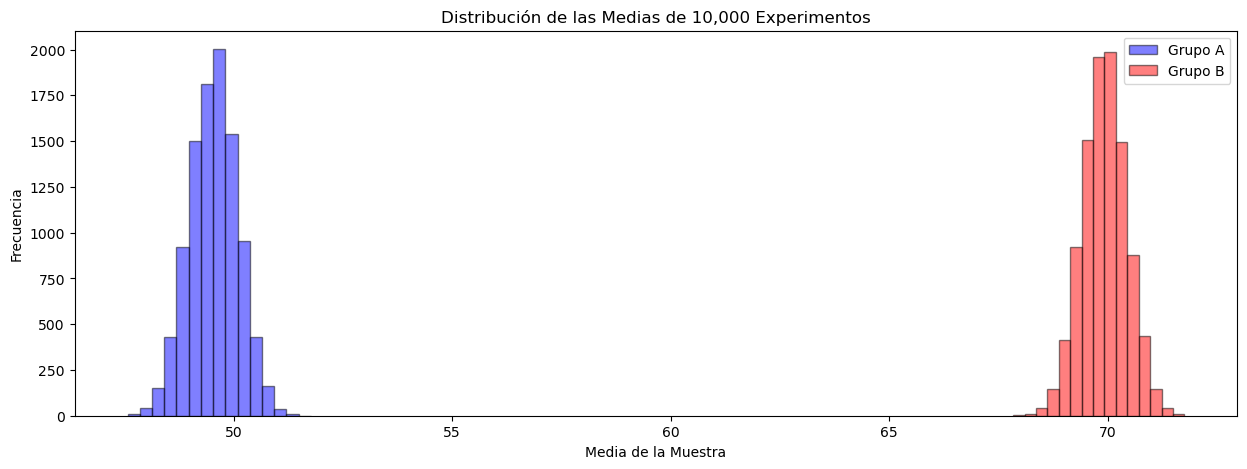

In [7]:
# Configurar la figura
plt.figure(figsize=(15, 5))

# Graficar histogramas de las columnas 'A' y 'B' de df_medias
plt.hist(df_medias['A'], bins=15, alpha=0.5, color='blue', edgecolor='black', linewidth=1, label='Grupo A')
plt.hist(df_medias['B'], bins=15, alpha=0.5, color='red', edgecolor='black', linewidth=1, label='Grupo B')

# Añadir títulos y etiquetas
plt.title('Distribución de las Medias de 10,000 Experimentos')
plt.xlabel('Media de la Muestra')
plt.ylabel('Frecuencia')

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


**Análisis 5** Repetir el gráfico doble anterior pero añadiéndole, para cada una de las dos columnas `A` y `B` del dataframe `df_medias`:

- Una línea vertical verde representando la media $\mu$ correspondiente (es decir la media de `A`en el histograma de `A`, la media de `B` en el histograma de `B`)
- Una linea vertical roja a $\mu-2\sigma$ y otra a $\mu +2\sigma$, con $\sigma$ la desviación típica, representando en cada caso la distancia de $2\sigma$ con respecto a la media.

Para ello partir del siguiente ejemplo tomado de otro notebook (hay que adaptarlo un poco)

    plt.axvline(media, color='red', linestyle='--', linewidth=2)


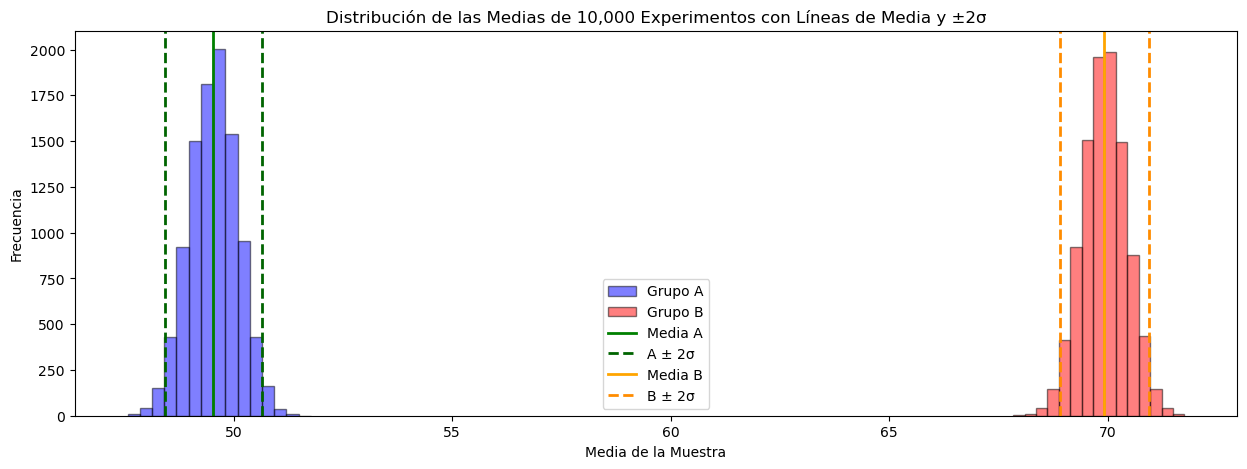

In [8]:

# Calcular las medias y desviaciones típicas para cada grupo
mu_A = df_medias['A'].mean()
sigma_A = df_medias['A'].std()

mu_B = df_medias['B'].mean()
sigma_B = df_medias['B'].std()

# Crear la figura con el tamaño especificado
plt.figure(figsize=(15, 5)) 

# Crear el primer histograma para la columna 'A' de df_medias
graficoA = df_medias['A'].plot(kind="hist", bins=15, alpha=0.5, color="blue", edgecolor='black', linewidth=1, label='Grupo A')

# Añadir el segundo histograma para la columna 'B' de df_medias al mismo gráfico
df_medias['B'].plot(kind="hist", bins=15, alpha=0.5, color="red", edgecolor='black', linewidth=1, label='Grupo B', ax=graficoA)

# Añadir las líneas verticales para el Grupo A
plt.axvline(mu_A, color='green', linestyle='-', linewidth=2, label='Media A')
plt.axvline(mu_A - 2 * sigma_A, color='darkgreen', linestyle='--', linewidth=2, label='A ± 2σ')
plt.axvline(mu_A + 2 * sigma_A, color='darkgreen', linestyle='--', linewidth=2, )

# Añadir las líneas verticales para el Grupo B
plt.axvline(mu_B, color='orange', linestyle='-', linewidth=2, label='Media B')
plt.axvline(mu_B - 2 * sigma_B, color='darkorange', linestyle='--', linewidth=2, label='B ± 2σ')
plt.axvline(mu_B + 2 * sigma_B, color='darkorange', linestyle='--', linewidth=2, )

# Añadir títulos y etiquetas
plt.title('Distribución de las Medias de 10,000 Experimentos con Líneas de Media y ±2σ')
plt.xlabel('Media de la Muestra')
plt.ylabel('Frecuencia')

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

¿Se puede decir que la media de tiempo requerido por las piezas del grupo A es diferente a la media del tiempo requerido por el grupo B con una diferencia significativa (del 95%)?

In [9]:
# Visualmente se puede inferir que la media del tiempo requerido para las piezas del Grupo B es mayor que la del Grupo A.
# Lo del 95% creería que también... aunque creo habria que calcularlo    

from scipy.stats import bootstrap


# Definir la función para la diferencia de medias
def mean_diff(data1, data2):
    return data1.mean() - data2.mean()

# Realizar el bootstrapping
boot_result = bootstrap(
    (df_medias['A'], df_medias['B']),
    mean_diff,
    confidence_level=0.95,
    n_resamples=10000,
    method='percentile'
)

# Obtener el intervalo de confianza
ci_low = boot_result.confidence_interval.low
ci_high = boot_result.confidence_interval.high

# Calcular la diferencia de medias
diff_mean = mean_diff(df_medias['A'], df_medias['B'])

print(f"Diferencia de medias: {diff_mean:.4f}")
print(f"Intervalo de confianza al 95%: [{ci_low:.4f}, {ci_high:.4f}]")

# Interpretación de los resultados
if ci_low > 0:
    print("La media del Grupo A es significativamente mayor que la del Grupo B (95% de confianza).", )
elif ci_high < 0:
    print("La media del Grupo B es significativamente mayor que la del Grupo A (95% de confianza).", )
else:
    print("No hay una diferencia significativa entre las medias de los Grupos A y B (95% de confianza).")


# Espero haberlo aplicado correctamente :) 

#Igual buscando información, sugieren emplear la prueba t de Student, no me quda claro cuando sale mejor una u otra. Entre las diferencias que encontré sería como en este caso que no se asume normalidad en los datos, la prueba t de Student no se recomendaría usarla.


Diferencia de medias: -20.3889
Intervalo de confianza al 95%: [-20.4035, -20.3738]
La media del Grupo B es significativamente mayor que la del Grupo A (95% de confianza).


**Análisis 6** [2 puntos] Consideramos el siguiente dataframe con datos de usuarios de X. La columna `verified` indica si está verificado en X, la columna `mediana` la renta mediana de la zona desde la que emite y la columna `followers` el número de seguidores que tiene. 

Queremos saber si el número de seguidores es significativamente diferente de media para los usuarios verificados con respecto a los que no (95%). Usar en la biblioteca scipy, con el método para ver la diferencia de medias.

Mostrar en cada caso un mensaje (si es estadísticamente superior el número de seguidores medio para los verificados, o para los no verificados, o si no hay diferencia, y lo mismo para la renta)

In [10]:
import pandas as pd
url = "https://raw.githubusercontent.com/RafaelCaballero/tdm/refs/heads/master/datos/usersconrenta.csv"

# solución
df = pd.read_csv(url,parse_dates=['created_at'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   id             1598 non-null   int64              
 1   followers      1598 non-null   int64              
 2   created_at     1598 non-null   datetime64[ns, UTC]
 3   friends_count  1598 non-null   int64              
 4   screen_name    1598 non-null   object             
 5   verified       1598 non-null   bool               
 6   tweets         1598 non-null   int64              
 7   localidad      1598 non-null   object             
 8   provincia      1598 non-null   object             
 9   distrito       1598 non-null   object             
 10  seccion        1598 non-null   int64              
 11  cambio1518     1598 non-null   int64              
 12  mediana        1598 non-null   float64            
 13  rentapaismin   1598 non-null   int64            

In [11]:
import pandas as pd
import numpy as np
from scipy.stats import bootstrap

# Comparar número de seguidores
verificados_followers = df[df['verified'] == True]['followers']
no_verificados_followers = df[df['verified'] == False]['followers']

boot_result_followers = bootstrap(
                                    (verificados_followers, no_verificados_followers), 
                                    mean_diff, 
                                    confidence_level=0.95, 
                                    n_resamples=10000, 
                                    random_state=1)

diff_mean_followers = mean_diff(verificados_followers, no_verificados_followers)
ci_low_followers, ci_high_followers = boot_result_followers.confidence_interval

print("Comparación de seguidores:")
print(f"Diferencia de medias: {diff_mean_followers:.4f}")
print(f"Intervalo de confianza al 95%: [{ci_low_followers:.4f}, {ci_high_followers:.4f}]")

if ci_low_followers > 0:
    print("El número de seguidores es significativamente mayor para los usuarios verificados (95% de confianza).")
elif ci_high_followers < 0:
    print("El número de seguidores es significativamente mayor para los usuarios no verificados (95% de confianza).")
else:
    print("No hay una diferencia significativa en el número de seguidores entre usuarios verificados y no verificados (95% de confianza).")


Comparación de seguidores:
Diferencia de medias: 102043.7830
Intervalo de confianza al 95%: [54279.5947, 190200.0967]
El número de seguidores es significativamente mayor para los usuarios verificados (95% de confianza).


In [12]:
# Comparar renta mediana
verificados_renta = df[df['verified'] == True]['mediana']
no_verificados_renta = df[df['verified'] == False]['mediana']

boot_result_renta = bootstrap(
                            (verificados_renta, no_verificados_renta), 
                            mean_diff, 
                            confidence_level=0.95, 
                            n_resamples=10000, 
                            random_state=1
)

diff_mean_renta = mean_diff(
                        verificados_renta, 
                        no_verificados_renta
)

ci_low_renta, ci_high_renta = boot_result_renta.confidence_interval

print("\nComparación de renta mediana:")
print(f"Diferencia de medias: {diff_mean_renta:.4f}")
print(f"Intervalo de confianza al 95%: [{ci_low_renta:.4f}, {ci_high_renta:.4f}]")

if ci_low_renta > 0:
    print("La renta mediana es significativamente mayor para los usuarios verificados (95% de confianza).")
elif ci_high_renta < 0:
    print("La renta mediana es significativamente mayor para los usuarios no verificados (95% de confianza).")
else:
    print("No hay una diferencia significativa en la renta mediana entre usuarios verificados y no verificados (95% de confianza).")


Comparación de renta mediana:
Diferencia de medias: 1733.8393
Intervalo de confianza al 95%: [-744.6078, 5611.4711]
No hay una diferencia significativa en la renta mediana entre usuarios verificados y no verificados (95% de confianza).


**Análisis 7** (2 puntos)

Consideramos ahora los datos de contaminación

In [13]:
import pandas as pd
url = "https://raw.githubusercontent.com/RafaelCaballero/tdm/refs/heads/master/datos/madrid/contaminacionLargo.csv"
df = pd.read_csv(url,parse_dates=['fechaH','fecha']).dropna()
df

,ANO,MES,DIA,HORA,CO,NO,NO2,PM2.5,PM10,NOx,O3,fechaH,fecha,festivo
5033,2019.0,8.0,1.0,1.0,0.2,4.0,22.0,10.0,19.0,29,58.87,2019-08-01 00:00:00,2019-01-08,laborable
5034,2019.0,8.0,1.0,2.0,0.2,2.0,15.0,10.0,21.0,18,63.73,2019-08-01 01:00:00,2019-01-08,laborable
5035,2019.0,8.0,1.0,3.0,0.1,4.0,14.0,9.0,18.0,19,66.50,2019-08-01 02:00:00,2019-01-08,laborable
5036,2019.0,8.0,1.0,4.0,0.1,1.0,14.0,10.0,18.0,15,66.62,2019-08-01 03:00:00,2019-01-08,laborable
5037,2019.0,8.0,1.0,5.0,0.2,2.0,15.0,10.0,19.0,18,62.57,2019-08-01 04:00:00,2019-01-08,laborable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20946,2021.0,5.0,25.0,11.0,0.3,18.0,38.0,9.0,18.0,66,47.20,2021-05-25 10:00:00,2021-05-25,laborable
20947,2021.0,5.0,25.0,12.0,0.3,17.0,37.0,7.0,16.0,62,60.22,2021-05-25 11:00:00,2021-05-25,laborable
20948,2021.0,5.0,25.0,13.0,0.2,11.0,31.0,7.0,16.0,49,73.93,2021-05-25 12:00:00,2021-05-25,laborable
20949,2021.0,5.0,25.0,14.0,0.2,8.0,26.0,5.0,11.0,39,86.67,2021-05-25 13:00:00,2021-05-25,laborable


In [14]:
NOs = ["NO", "NO2"]
df.describe()[NOs]

,NO,NO2
count,15398.000000,15398.000000
mean,28.532212,42.087609
min,1.000000,2.000000
25%,6.000000,21.000000
50%,12.000000,36.000000
75%,31.000000,56.000000
max,580.000000,215.000000
std,45.504117,28.947517


Querríamos comparar el comportamiento (por ejemplo la desviación típica) de NO y NO2, pero tenemos un problema; están en escalas diferentes y no parecen comparables. 

Para hacerlos comparables proponemos llevarlos a la misma escala, suponiendo que el valor más alto que tienen el es máximo y el valor más bajo el mínimo, es decir vamos a escalarlos a escala [0,1]. Para ello,

1 Generar una nueva columna `NOe` (NO Escalado) que se obtenga como $$\mathit{NOe} = \frac{\mathit{NO}-m}{M-m}$$ donde M es el máximo de la columna `NO` y m el mínimo de `NO`

2 Lo mismo con NO2, a partir de su máximo y su mínimo obtener $$\mathit{NO2e} = \frac{\mathit{NO2}-m'}{M'-m'}$$ donde M' es el máximo de la columna `NO2` y m' el mínimo


In [15]:
# solución

# Escalar NO
NO_min = df['NO'].min()
NO_max = df['NO'].max()
df['NOe'] = (df['NO'] - NO_min) / (NO_max - NO_min)

# Escalar NO2
NO2_min = df['NO2'].min()
NO2_max = df['NO2'].max()
df['NO2e'] = (df['NO2'] - NO2_min) / (NO2_max - NO2_min)

### No cambiar esto, es para ver si todo ha ido bien
NOs = ["NO", "NO2","NOe","NO2e"]
print(df.describe()[NOs])

#Creo que esta sería la interpretación:
print("Ahora NOe y NO2e están en la misma escala [0,1], donde 0 representa el valor mínimo original y 1 el máximo original para cada variable.")

#Aunque buscando un poco mas de información, encontré que este método es muy sencible a los valores outliers. Recomiendan metodos alternativos como el Z-score si la data está mas afectada por outliers.


                 NO           NO2           NOe          NO2e
count  15398.000000  15398.000000  15398.000000  15398.000000
mean      28.532212     42.087609      0.047551      0.188205
min        1.000000      2.000000      0.000000      0.000000
25%        6.000000     21.000000      0.008636      0.089202
50%       12.000000     36.000000      0.018998      0.159624
75%       31.000000     56.000000      0.051813      0.253521
max      580.000000    215.000000      1.000000      1.000000
std       45.504117     28.947517      0.078591      0.135904
       NO   NO2       NOe      NO2e
5033  4.0  22.0  0.005181  0.093897
5034  2.0  15.0  0.001727  0.061033
5035  4.0  14.0  0.005181  0.056338
5036  1.0  14.0  0.000000  0.056338
5037  2.0  15.0  0.001727  0.061033
Ahora NOe y NO2e están en la misma escala [0,1], donde 0 representa el valor mínimo original y 1 el máximo original para cada variable.


**Análisis 8** 
Ver si la diferencia de desviaciones típicas entre `NOe`y `NO2e` es estadísticamente significativa utilizado boostrap de forma similar al ejercicio 6 (pero para std).
Mostrar solo la diferencia de desviaciones típicas


In [16]:
# solución

def std_diff(data1, data2):
    return np.std(data1, ddof=1) - np.std(data2, ddof=1)

print("Comparamos las desviaciones típicas de NOe y NO2e para ver si la variabilidad relativa de NO y NO2 es significativamente diferente.")
print("Nota: Como NOe y NO2e están escaladas, esta comparación nos dice si un contaminante varía más en relación a su propio rango que el otro.")


# Realizar el bootstrapping
boot_result = bootstrap(
                            (df['NOe'], df['NO2e']),
                            std_diff,
                            confidence_level=0.95,
                            n_resamples=10000,
                            random_state=1
)

# Calcular la diferencia de desviaciones típicas
diff_std = std_diff(df['NOe'], df['NO2e'])

# Obtener el intervalo de confianza
ci_low, ci_high = boot_result.confidence_interval

print(f"Diferencia de desviaciones típicas (NOe - NO2e): {diff_std:.6f}")
print(f"Intervalo de confianza al 95%: [{ci_low:.6f}, {ci_high:.6f}]")

if ci_low > 0:
    print("La desviación típica de NOe es significativamente mayor que la de NO2e (95% de confianza).")
elif ci_high < 0:
    print("La desviación típica de NO2e es significativamente mayor que la de NOe (95% de confianza).")
else:
    print("No hay una diferencia significativa entre las desviaciones típicas de NOe y NO2e (95% de confianza).")

Comparamos las desviaciones típicas de NOe y NO2e para ver si la variabilidad relativa de NO y NO2 es significativamente diferente.
Nota: Como NOe y NO2e están escaladas, esta comparación nos dice si un contaminante varía más en relación a su propio rango que el otro.
Diferencia de desviaciones típicas (NOe - NO2e): -0.057313
Intervalo de confianza al 95%: [-0.061176, -0.053264]
La desviación típica de NO2e es significativamente mayor que la de NOe (95% de confianza).
